## Module 1 : Fetch Data

In [2]:
#Import Packages
# For reading the data from the github link
import os
import tarfile
import urllib

#For loading the data to pandas dataframe
import pandas as pd

#visualize
%matplotlib inline
import matplotlib.pyplot as plt

#series functions

import numpy as np


In [3]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    
fetch_housing_data()



def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Module 2 : Clean Data

In [15]:
df = housing.copy()
df = df.reset_index()
df.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
def __GetIntCols(df, collist):
    for col in collist:
        df[col] = df[col].str.extract('(\d+)').astype(float)
    return(df)

def get_prop_missing_values(df):
    print("Null info in data: ", df.isna().any().sum())
    #prop_missing = round((df[df.columns[:]].isnull().sum()/df[df.columns[:]].count())*100,4)
    prop_missing = round((df.isnull().sum()/len(df))*100,2)
    print("These are the missing values proportions in each column")
    print(prop_missing)
    return()


def __SetColumnTypes(df, change_to_int_list = ['col1']):
    cols = df.columns
    try:
        df = __GetIntCols(df, change_to_int_list)
    except:
        pass
    # Check for any null values in the data
    return(df, cols)


# For this particular dataframe

clean_df, cols = __SetColumnTypes(df)

# Get list of column by types
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = list(set(cols) - set(numeric_cols))
numeric_cols.remove('index')
numeric_cols.remove('median_house_value')
print(categorical_cols)
print(numeric_cols)

['ocean_proximity']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


## Module 3 : Explore Data

Distribution for
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


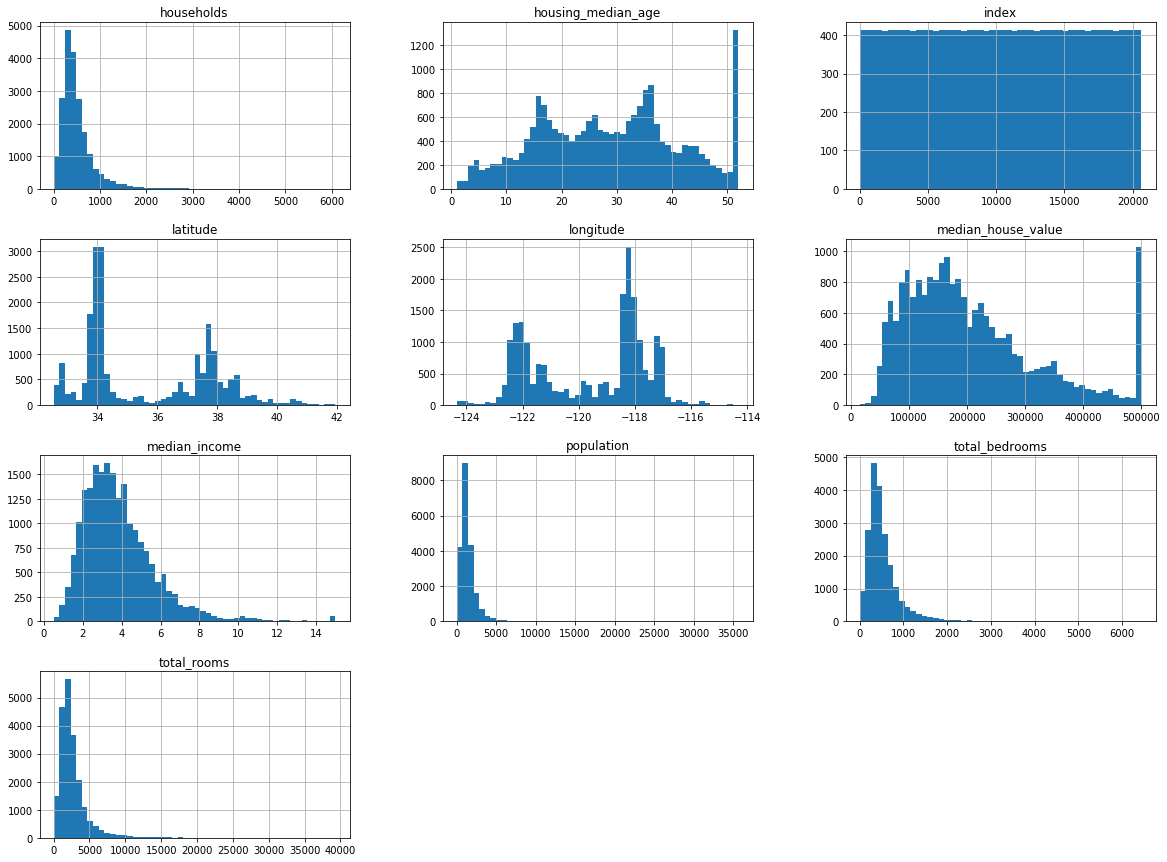

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,10319.500000,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,5958.399114,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,5159.750000,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,10319.500000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,15479.250000,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
def __ExploringDataframe(df, cat_list):
    for col in cat_list:
        print("Distribution for")
        print(col)
        print(df[col].value_counts())

    # Above data as plots
    df.hist(bins=50, figsize=(20,15))
    plt.show()
    return()

__ExploringDataframe(clean_df, categorical_cols)
# Lets look at the rest of the fields - we can check out the numeric data using describe method
clean_df.describe()

## Module 4 : Pre-Proccess Model Data

 Original set distribution of income_cat 3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
 New set distribution of income_cat 3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


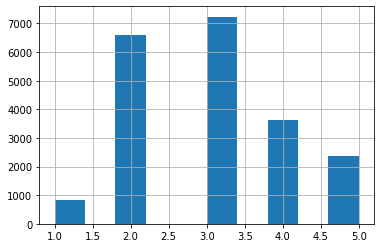

In [20]:
# Step 4: Create test set
from sklearn.model_selection import StratifiedShuffleSplit

#For a stratified sample incase there is a variable we think affects the dependant more
# and we want split in test to be similar to train. First we create a categorical variable out of it
# Here we want to make sure our split test set has similar distribution as test set of this important variable

clean_df["income_cat"] = pd.cut(clean_df['median_income'],
                              bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels = [1,2,3,4,5]
                              )

clean_df['income_cat'].hist()

print(" Original set distribution of income_cat", clean_df['income_cat'].value_counts()/len(clean_df))



split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(clean_df, clean_df['income_cat']):
    strat_train_set = clean_df.loc[train_index]
    strat_test_set = clean_df.loc[test_index]


print(" New set distribution of income_cat", strat_test_set['income_cat'].value_counts()/len(strat_test_set))
# Remove the new created categorical variable

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [21]:
# Step 5: Put the test set aside

model_df = strat_train_set.copy()

## Module 5 : Exploratory Data Analysis

Plot 1: Simple scatter plot of feature1 and feature2
Plot 2: Scatter plot of feature1 and feature2 with density feature
Plot 3: Scatter plot with df; target as color


()

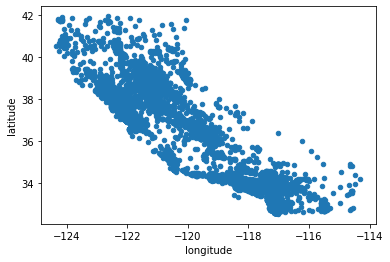

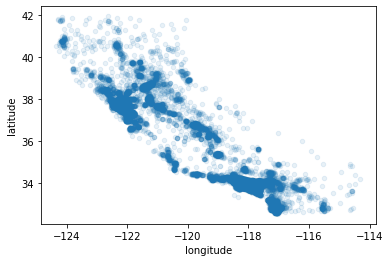

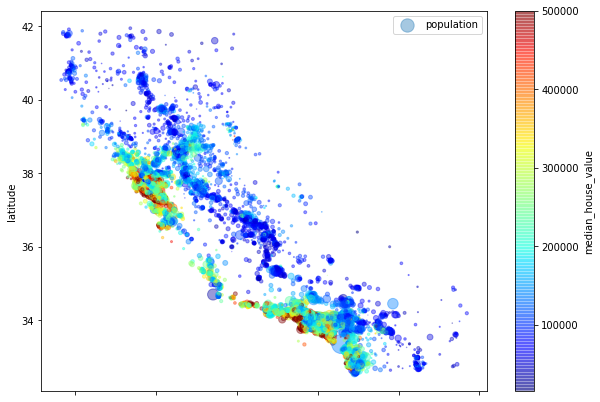

In [22]:
def __SimpleScatterPlots(df, feature1, feature2, feature3, target):
    try:
        print("Plot 1: Simple scatter plot of feature1 and feature2")
        df.plot(kind='scatter', x=feature1, y=feature2)

        # Using density to see which areas are densly populated
        print("Plot 2: Scatter plot of feature1 and feature2 with density feature")
        df.plot(kind='scatter', x=feature1, y=feature2, alpha = 0.1)

        # Adding more variable features to map color of circle (price) and size of circle (population)

        print("Plot 3: Scatter plot with df; target as color")
        df.plot(kind='scatter', x=feature1, y=feature2, alpha = 0.4,
                    s= df[feature3]/100, label= feature3, figsize = (10,7),
                    c= target, cmap = plt.get_cmap("jet"), colorbar= True
                    )
        plt.legend()
    except:
        pass
    return()

__SimpleScatterPlots(model_df, 'longitude', 'latitude', 'population', 'median_house_value')

## Module 6 : Train Model

## Module 7 : Fit Trained Modela

## Module 9 : Predict